In [7]:
# Show the plots in the notebook.
%matplotlib inline
# Set the plots size.
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 14, 7

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [9]:
def plot_results(df):
    fig, ax = plt.subplots(2, sharex=True)
    time = df.index
    
    long_signal = df.OrderSignal == 1
    short_signal = df.OrderSignal == -1

    # The first subplot is the close price and the orders.
    ax[0].set_title('Close Prices', fontsize=16)
    ax[0].plot(time, df.Close, label='Price')
    ax[0].plot(time, df.Decycle, label='Decycle')

    ax[0].plot(time[long_signal], df.Close[long_signal], linestyle='None', marker='^', 
               color='g', markersize=10, label='Long')
    ax[0].plot(time[short_signal], df.Close[short_signal], linestyle='None', marker='v',
               color='r', markersize=10, label='Short')
               
    ax[0].set_ylabel('($)', fontsize=14)
    ax[0].legend(loc='upper left')
    ax[0].grid()

    # The second subplot are the indicator and the trigger.
    ax[1].set_title('Inverse Fisher', fontsize=16)

    ax[1].plot(time, df.InvFisher, label='Inverse Fisher')
    ax[1].axhline(y=0.9, color='green', alpha=0.6)
    ax[1].axhline(y=-0.9, color='red', alpha=0.6)
    ax[1].set_xlabel('Time', fontsize=12)
    ax[1].legend(loc='upper left')
    ax[1].grid()

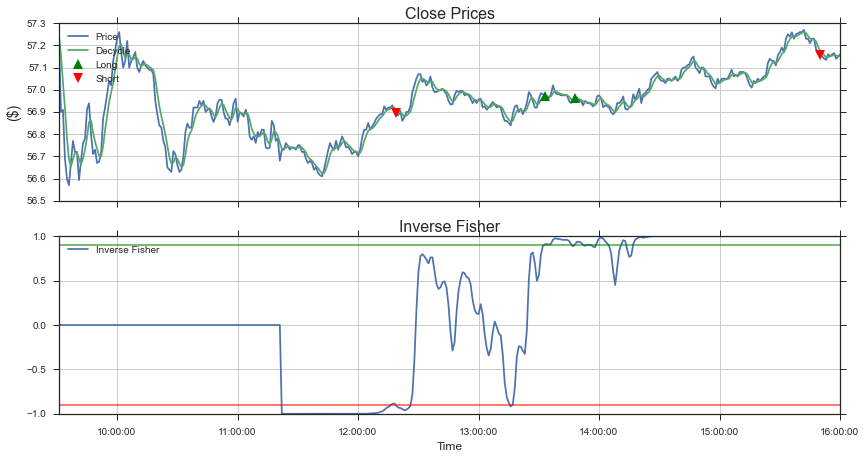

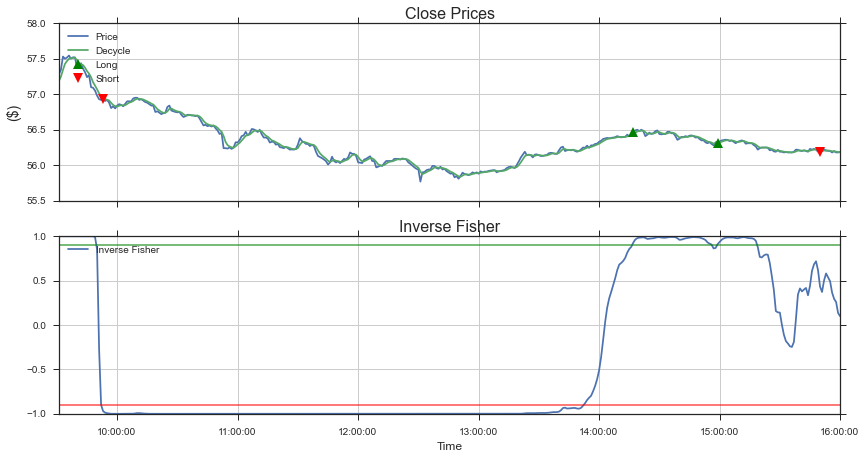

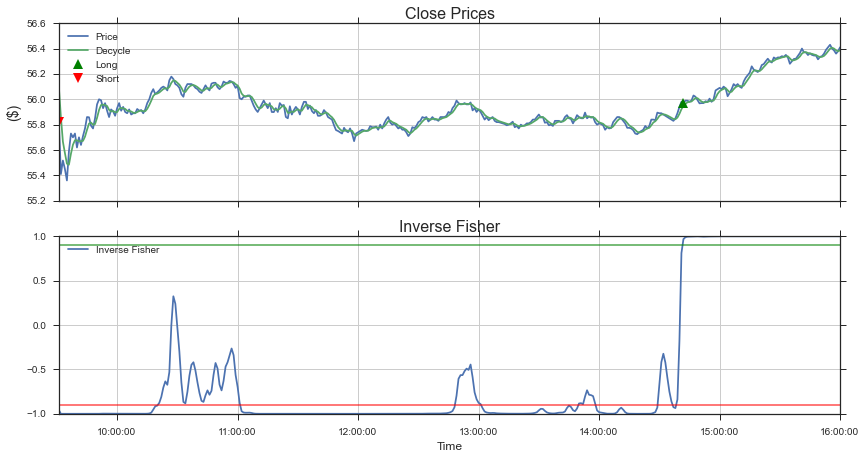

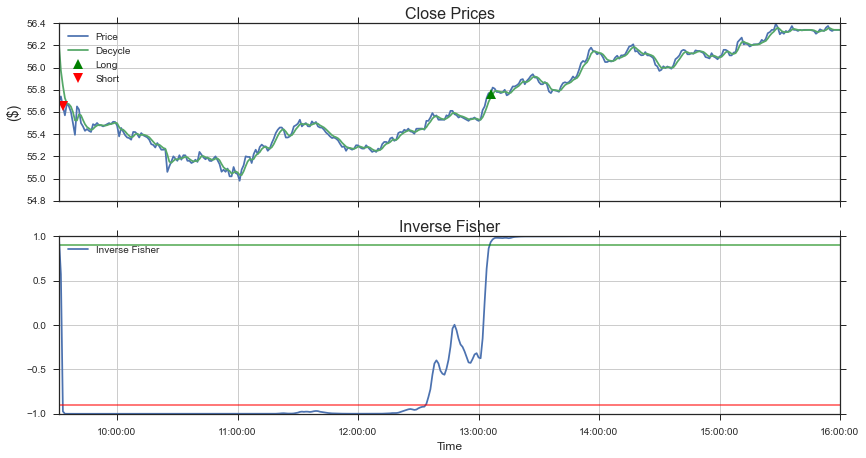

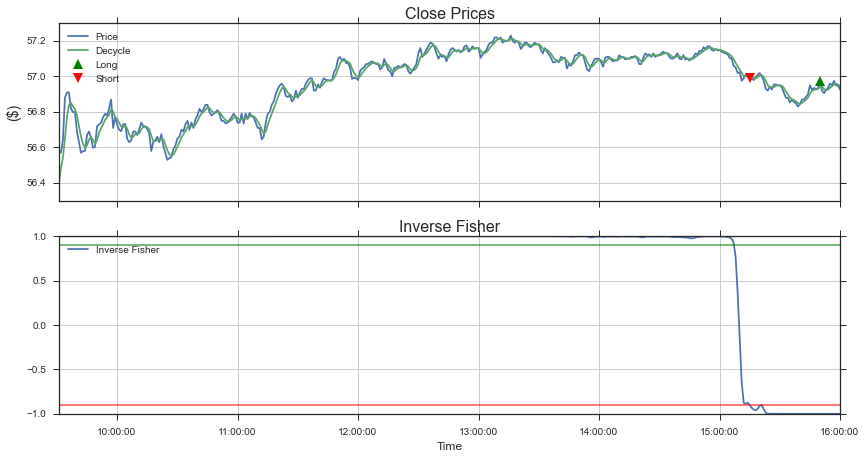

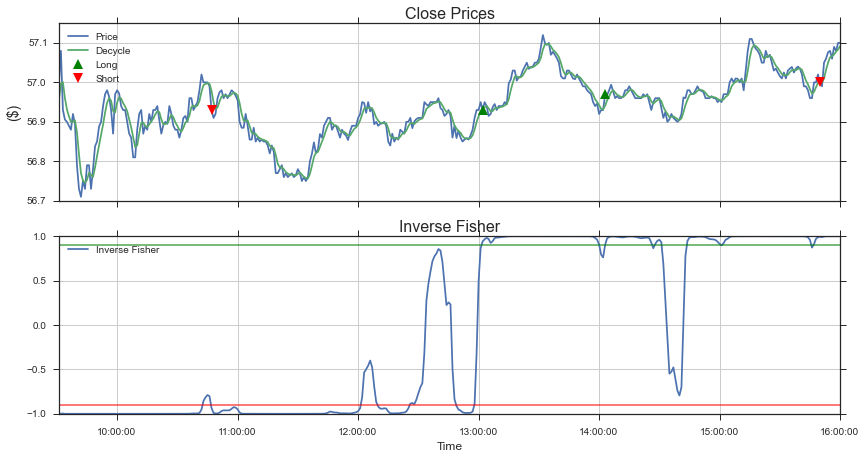

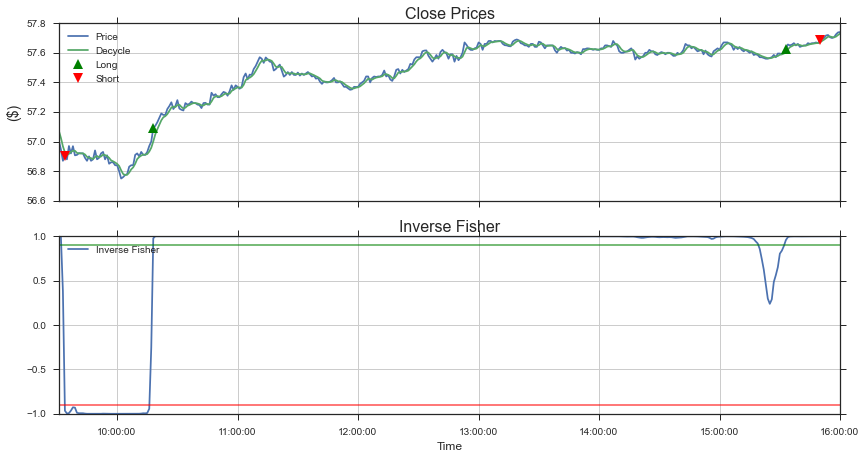

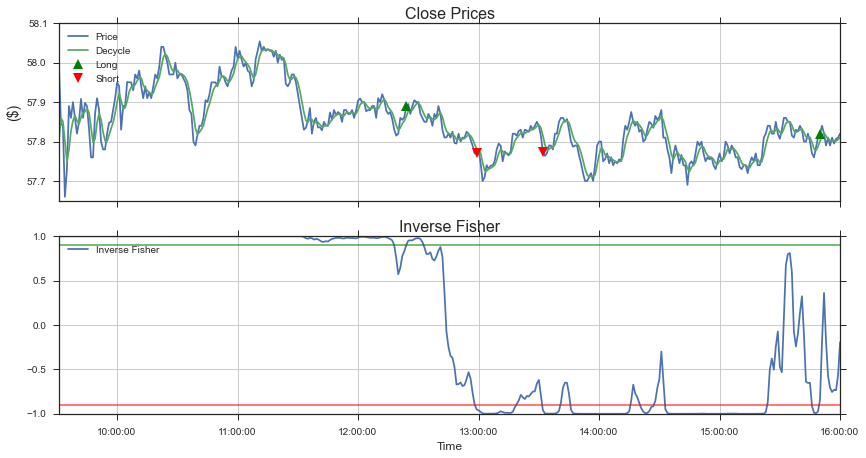

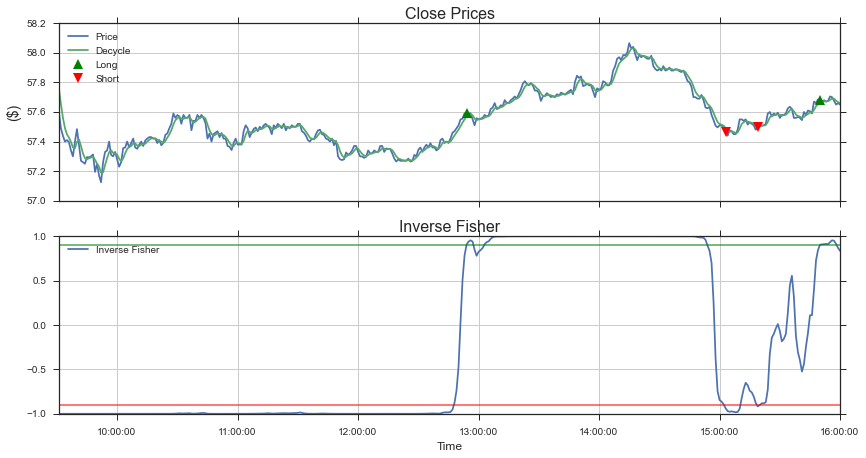

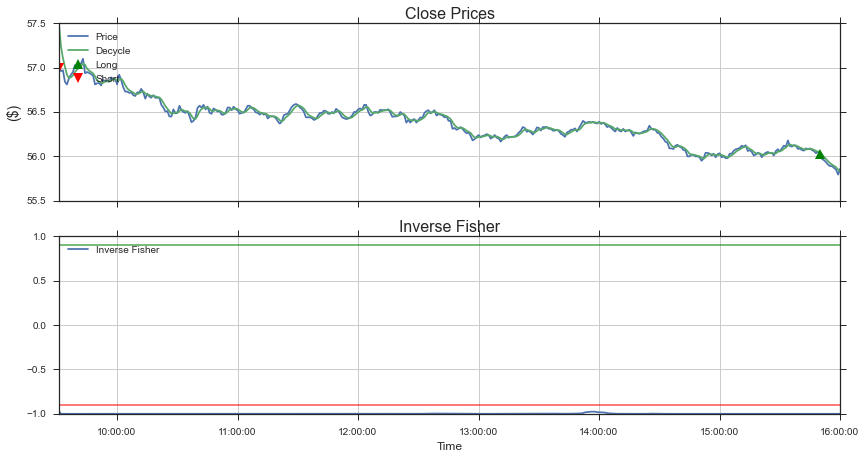

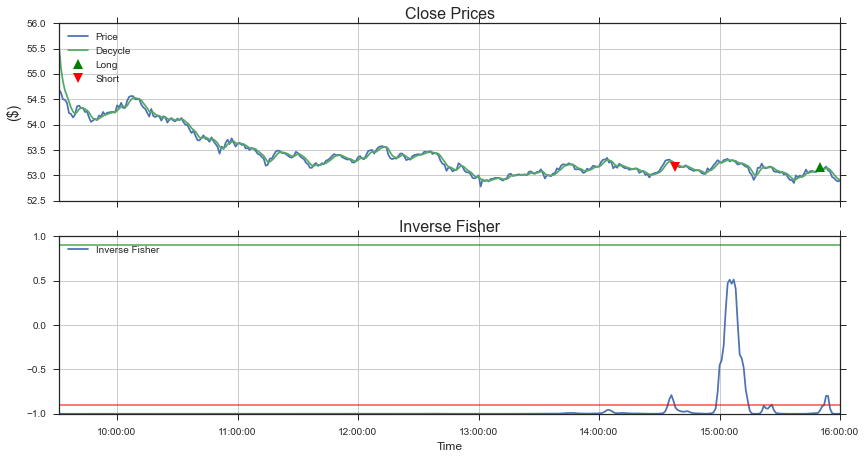

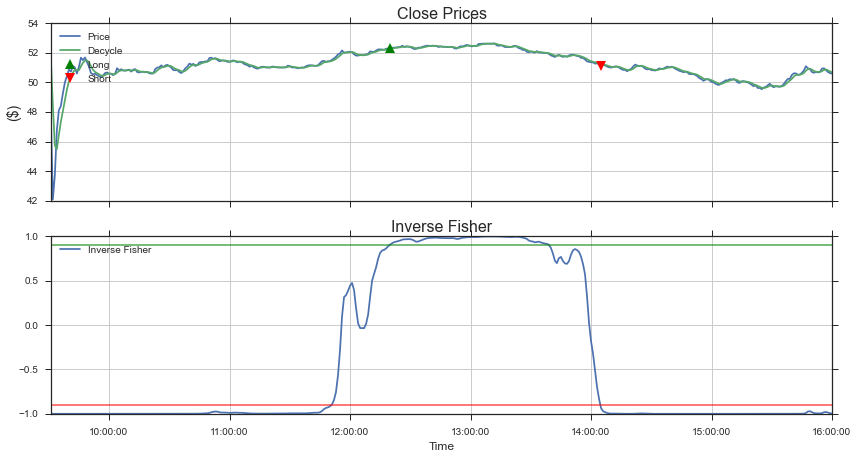

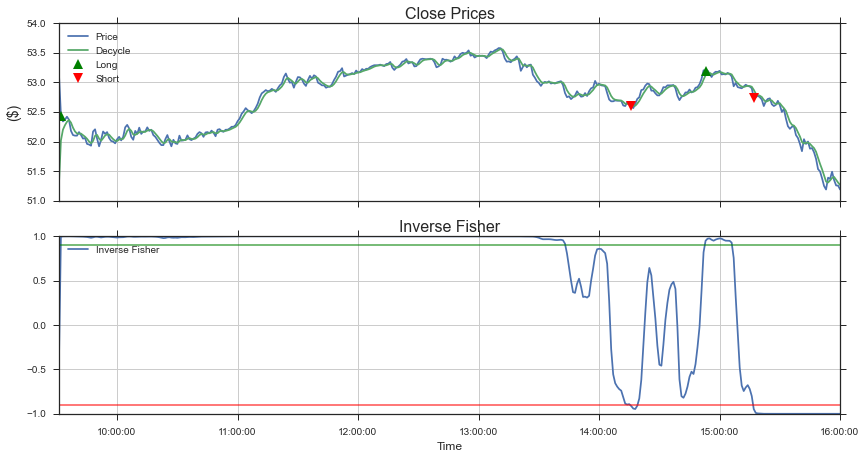

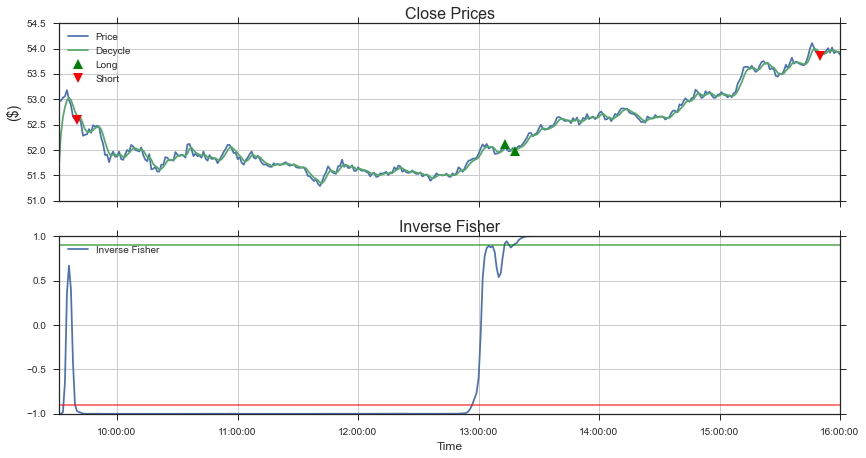

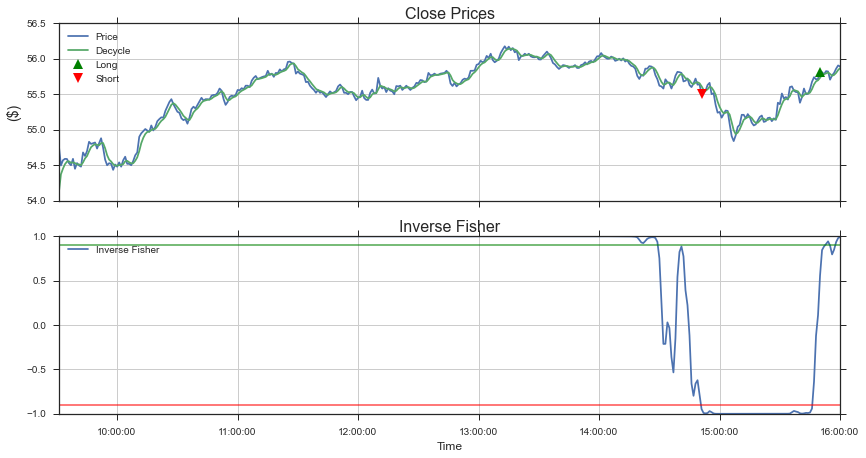

In [10]:
data = pd.read_csv('LittleWing_SBUX.csv',
                 index_col=0, parse_dates=True,
                 usecols=[1, 2, 3, 4, 6])
data.columns = ["Close", "Decycle", "InvFisher", "OrderSignal"]

for i in range(15):
    start_idx = 390 * i + 169
    end_idx = 390 * (i + 1) + 169
    df = data.ix[start_idx:end_idx,:]
    plot_results(df)